## <center>Quantum Obfuscator</center>

## Contents

1. Introduction 
2. Overview of the Concept
3. Example: Without Interception
4. Example: With Interception
5. Risk Analysis

# 1. Introduction

Very soon all classic cryptography and obfuscation techniques will be rendered redundant due to quantum mechanics. Thus, comes the need of quantum computing. In our project we try to apply principles of quantum computing to Obfuscation Techniques. Consider the following scenario:

When Alice and Bob want to communicate a code over an insecure channel (such as the internet), it is essential to obfuscate it. It is but obvious that both Alice and Bob having a secret key that no one else knows is useful and allows them to communicate using symmetric-key communication.

If Alice and Bob want to use Eve’s classical communication channel to share their key, it is impossible to tell if Eve has made a copy of this key for herself- they must place complete trust in Eve that she is not intercepting. If, however, Eve provides a quantum communication channel, Alice and Bob no longer need to trust Eve at all- they will know if she tries to read Bob’s message before it gets to Alice.


## 2. Overview of the Concept 

The protocol makes use of the fact that measuring a qubit can change its state. If Sender A sends B a qubit, and an eavesdropper tries to measure it before B does, there is a great chance that the intruder's measurement will change the state of the qubit and B will not receive the qubit state A sent. To implement the same, we use Python's Qiskit Library that provides functionalities for Quantum Computing

In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 KB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 K

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np

If Alice prepares a qubit in the state $|+\rangle$ (`0` in the $X$-basis), and Bob measures it in the $X$-basis, Bob is sure to measure `0`:

┌───┐ ░ ┌───┐┌─┐
  q: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

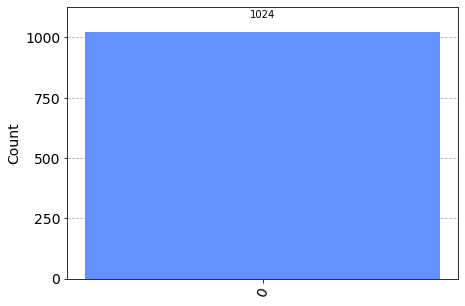

In [ ]:
qc = QuantumCircuit(1,1) #0
# A prepares qubit in state |+>
qc.h(0)
qc.barrier()
# A now sends the qubit to B who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(assemble(qc))
#gives count of qubit states
plot_histogram(job.result().get_counts())

But if the intruder tries to measure this qubit in the $Z$-basis before it reaches B, they will change the qubit's state from $|+\rangle$ to either $|0\rangle$ or $|1\rangle$, and Bob is no longer certain to measure `0`:

┌───┐┌─┐ ░ ┌───┐┌─┐
  q: ┤ H ├┤M├─░─┤ H ├┤M├
     └───┘└╥┘ ░ └───┘└╥┘
c: 1/══════╩══════════╩═
           0          0

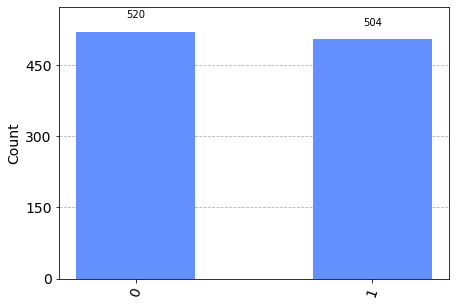

In [ ]:
qc = QuantumCircuit(1,1)
# A prepares qubit in state |+>
qc.h(0)
# A now sends the qubit to B
# but intruder intercepts and tries to read it
qc.measure(0, 0)
qc.barrier()
# E then passes this on to B who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(assemble(qc))
plot_histogram(job.result().get_counts())

We can see here that B now has a 50% chance of measuring `1`, and if he does, he and A will know there is something wrong with their channel.

The cryptography protocol involves repeating this process enough times that an eavesdropper has a negligible chance of getting away with this interception. 
Basic algorithm for the process is:

**- Step 1**

Sender chooses a string of random bits, e.g.:

`1000101011010100`

And a random choice of basis for each bit:

`ZZXZXXXZXZXXXXXX`

This information is kept private with the sender. 

**- Step 2**

A then encodes each bit onto a string of qubits using the basis chosen; this means each qubit is in one of the states $|0\rangle$, $|1\rangle$, $|+\rangle$ or $|-\rangle$, chosen at random. In this case, the string of qubits would look like this:

$$ |1\rangle|0\rangle|+\rangle|0\rangle|-\rangle|+\rangle|-\rangle|0\rangle|-\rangle|1\rangle|+\rangle|-\rangle|+\rangle|-\rangle|+\rangle|+\rangle
$$

This is the message she sent to receiver.

**- Step 3**

The receiver then measures each qubit at random, for example, he might use the bases:

`XZZZXZXZXZXZZZXZ`

And the measurement results are kept private.

**- Step 4**

The communicators then publicly share which basis they used for each qubit. If B measured a qubit in the same basis A prepared it in, they use this to form part of their shared secret key, otherwise they discard the information for that bit.

**- Step 5**

Finally, B and A share a random sample of their keys, and if the samples match, they can be sure (to a small margin of error) that their transmission is successful.


## 3.Without Interception

`randint` function from numpy is used to generate pseudo-random keys. 

In [ ]:
np.random.seed(seed=0)

In [ ]:
n = 100 #length of sender's message

### Step 3.1:

Sender generates random set of bits:

In [ ]:
np.random.seed(seed=0)
n = 100
## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)
print(alice_bits)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]


At the moment, the set of bits '`alice_bits`' is only known to Alice.

### 3.2 Step 2:

Alice chooses to encode each bit on qubit in the $X$ or $Z$-basis at random, and stores the choice for each qubit in `alice_bases`. <br>
`0` : $Z$-basis<br>
`1` : $X$-basis

In [ ]:
alice_bases = randint(2, size=n)
print(alice_bases)

[1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]


Alice also keeps this knowledge private

The function `encode_message` below, creates a list of `QuantumCircuits`, each representing a single qubit in Alice's message:

In [ ]:
def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0: # Prepare qubit in Z-basis
            if bits[i] == 0:
                pass 
            else:
                qc.x(0)
        else: # Prepare qubit in X-basis
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

In [ ]:
message = encode_message(alice_bits, alice_bases)

We can see that the first bit in `alices_bits` is `0`, and the basis she encodes this in is the $X$-basis (represented by `1`):

In [ ]:
print('bit = %i' % alice_bits[0])
print('basis = %i' % alice_bases[0])

bit = 0
basis = 1


And if we view the first circuit in `message` (representing the first qubit in Alice's message), we can verify that Alice has prepared a qubit in the state $|+\rangle$:

In [ ]:
message[0].draw()

┌───┐ ░ 
  q: ┤ H ├─░─
     └───┘ ░ 
c: 1/════════

Similarly, the second bit in `alices_bits` is `1`, and the basis she encodes this in is the $Z$-basis (represented by `0`):

In [ ]:
print('bit = %i' % alice_bits[1])
print('basis = %i' % alice_bases[1])
message[1].draw()

bit = 1
basis = 0


┌───┐ ░ 
  q: ┤ X ├─░─
     └───┘ ░ 
c: 1/════════

This message of qubits is then sent to Bob over Eve's quantum channel:

### 3.3 Step 3:

Bob then measures each qubit in the $X$ or $Z$-basis at random and stores this information:

In [ ]:
bob_bases = randint(2, size=n)
print(bob_bases)

[1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1]


`bob_bases` stores Bob's choice for which basis he measures each qubit in.

Below, the function `decode_message` applies the corresponding decoding and simulates the result of measuring each qubit. We store the measurement results in `bob_results`.

In [ ]:
def decode_message(message, bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
        aer_sim = Aer.get_backend('aer_simulator')
        qobj = assemble(message[q], shots=1, memory=True)
        result = aer_sim.run(qobj).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

In [ ]:
bob_results = decode_message(message, bob_bases)

We can see that the circuit in `message[0]` (representing the 0th qubit) has had an $X$-measurement added to it by Bob:

In [ ]:
message[0].draw()

┌───┐ ░ ┌───┐┌─┐
  q: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

Since Bob has by chance chosen to measure in the same basis Alice encoded the qubit in, Bob is guaranteed to get the result `0`. For the 6th qubit (shown below), Bob's random choice of measurement is not the same as Alice's, and Bob's result has only a 50% chance of matching Alices'. 

In [ ]:
message[6].draw()

┌───┐ ░ ┌───┐┌─┐
  q: ┤ X ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

In [ ]:
print(bob_results)

[0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0]


Bob keeps his results private.

### 3.4 Step 4:

After this, Alice and Bob reveal through Eve's channel which qubits were encoded and decoded in which basis respectively

If Bob happened to measure a bit in the same basis Alice prepared it in, this means the entry in `bob_results` will match the corresponding entry in `alice_bits`, and they can use that bit as part of their key. If they measured in different bases, Bob's result is random, and they both throw that entry away. Here is a function `remove_garbage` that does this for us:

In [ ]:
def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits
            good_bits.append(bits[q])
    return good_bits

Alice and Bob both discard the useless bits, and use the remaining bits to form their secret keys:

In [ ]:
np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
bob_results = decode_message(message, bob_bases)

## Step 4
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
print(alice_key)

[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]


In [ ]:
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
print(bob_key)

[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]


### 3.5 Step 5:

Finally, Bob and Alice compare a random selection of the bits in their keys to make sure the protocol has worked correctly:

In [ ]:
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        i = np.mod(i, len(bits))
        sample.append(bits.pop(i))
    return sample

Alice and Bob both broadcast these publicly, and remove them from their keys as they are no longer secret:

In [ ]:
sample_size = 15
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
alice_sample = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [ ]:
bob_sample == alice_sample

True

If their samples match, it means  `alice_key == bob_key`. They now share a secret key they can use to encrypt their messages.

In [ ]:
print(bob_key)
print(alice_key)
print("key length = %i" % len(alice_key))

[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
key length = 33


## 4. *With* Interception

Let’s now see how Alice and Bob can tell if Eve has been trying to listen in on their quantum message. The procedure is same as above, but before Bob receives his qubits, Eve will try and extract some information from them.

In [ ]:
np.random.seed(seed=3)

### 4.1 Step 1:

Alice generates her set of random bits:

In [ ]:
alice_bits = randint(2, size=n)
print(alice_bits)

[0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1
 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1]


### 4.2 Step 2:

Alice encodes these in the $Z$ and $X$-bases at random, and sends these to Bob through Eve's quantum channel:

In [ ]:
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
print(alice_bases)

[1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1]


In this case, the first qubit in Alice's message is in the state $|+\rangle$:

In [ ]:
message[0].draw()

┌───┐ ░ 
  q: ┤ H ├─░─
     └───┘ ░ 
c: 1/════════

### Interception:

In [ ]:
eve_bases = randint(2, size=n)
intercepted_message = decode_message(message, eve_bases)
print(intercepted_message)

[1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0]


We can see the case of qubit 0 below; Eve's random choice of basis is not the same as Alice's, and this will change the qubit state from $|+\rangle$, to a random state in the $Z$-basis, with 50% probability of $|0\rangle$ or $|1\rangle$:

In [ ]:
message[0].draw()

┌───┐ ░ ┌─┐
  q: ┤ H ├─░─┤M├
     └───┘ ░ └╥┘
c: 1/═════════╩═
              0

### 4.3 Step 3:

Eve then passes on the qubits to Bob, who measures them at random. In this case, Bob chose (by chance) to measure in the same basis Alice prepared the qubit in. Without interception, Bob 100% measure `0`, but because Eve tried to read the message he now has a 50% chance of measuring `1` instead.

In [ ]:
bob_bases = randint(2, size=n)
bob_results = decode_message(message, bob_bases)
message[0].draw()

┌───┐ ░ ┌─┐┌───┐┌─┐
  q: ┤ H ├─░─┤M├┤ H ├┤M├
     └───┘ ░ └╥┘└───┘└╥┘
c: 1/═════════╩═══════╩═
              0       0

### 4.4 Step 4:

Bob and Alice reveal their basis choices, and discard the useless bits:

In [ ]:
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)

### 4.5 Step 5:

Bob and Alice compare the same random selection of their keys to see if the qubits were intercepted:

In [ ]:
sample_size = 15
bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0]
alice_sample = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [ ]:
bob_sample == alice_sample

False

Bob's key and Alice's key do not match because Eve tried to read the message between steps 2 and 3, and changed the qubits' states. For all Alice and Bob know, this could be due to noise in the channel, but either way they must throw away all their results and try again- Eve's interception attempt has failed.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 5. Risk Analysis

For this type of interception, there is a small chance that Bob and Alice's samples could match, and Alice sends her vulnerable message through Eve's channel. 

- For Alice and Bob to use a qubit's result, they must both have chosen the same basis. If Eve chooses this basis too, she will successfully intercept this bit without introducing any error. There is a 50% chance of this happening.
- If Eve chooses the *wrong* basis, i.e. a different basis to Alice and Bob, there is still a 50% chance Bob will measure the value Alice was trying to send. In this case, the interception also goes undetected.
- But if Eve chooses the *wrong* basis, i.e. a different basis to Alice and Bob, there is a 50% chance Bob will not measure the value Alice was trying to send, and this *will* introduce an error into their keys.

![](https://drive.google.com/uc?export=view&id=10WWmt50f8hLtKEfRboPYkDT2G-vrtK94)

If Alice and Bob compare 1 bit from their keys, the probability the bits will match is $0.75$, and if so they will not notice Eve's interception. If they measure 2 bits, there is a $0.75^2 = 0.5625$ chance of the interception not being noticed. We can see that the probability of Eve going undetected can be calculated from the number of bits ($x$) Alice and Bob chose to compare:

$$ P(\text{undetected}) = 0.75^x $$

If we decide to compare 15 bits as we did above, there is a 1.3% chance Eve will be undetected. On increasing bit size to 50 bits, we have a 0.00006% chance of being spied upon unknowingly.